# Introduction
Steel is the most important engineering and construction material as it is used in many aspects of our lives from home appliances such as refrigerators and washing machines to cargo ships and buildings. In Vietnam, the steel industry plays a particularly important role in the process of developing the country towards industrialization and modernization as steel is the input materials for important economic sectors of the country like mechanical engineering, construction... Vietnam steel industry has witnessed a strong growth in terms of quantity as well as quality of output in recent years, evidently, it was ranked as the 14th biggest steel producing country in 2020. As a result, the steel stock market has been attracting more and more attention from investors. This study will try to find the best portpolio of the three leaders in Vietnam steel industry namely Hoa Phat Group, Hoa Sen Group and Nam Kim Group using Efficient Markowittz Frontier.


# Steel Portfolio
Data below are stocks price of HPG, HSG, NKG from 2021 to 2022. Data source: cophieu68.vn

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sco
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

from vnstock import *

start = "2021-01-01"
end = "2022-12-31"

HPG = stock_historical_data(symbol='HPG', start_date = start, end_date = end)
HSG = stock_historical_data(symbol='HSG', start_date = start, end_date = end)
NKG = stock_historical_data(symbol='NKG', start_date = start, end_date = end)

## Price 

In [36]:
prices_df = pd.concat([HPG['Close'], HSG['Close'], NKG['Close']], axis= 1)
prices_df.columns = ['HPG', 'HSG', 'NKG']
prices_df.head(5)

,HPG,HSG,NKG
0,23536.0,17954.0,10725.0
1,23564.0,18030.0,10725.0
2,23814.0,17954.0,10658.0
3,23814.0,18257.0,10725.0
4,23786.0,18257.0,10658.0


Text(0.5, 1.0, 'Stock price of Steel Company from 2021 to 2022')

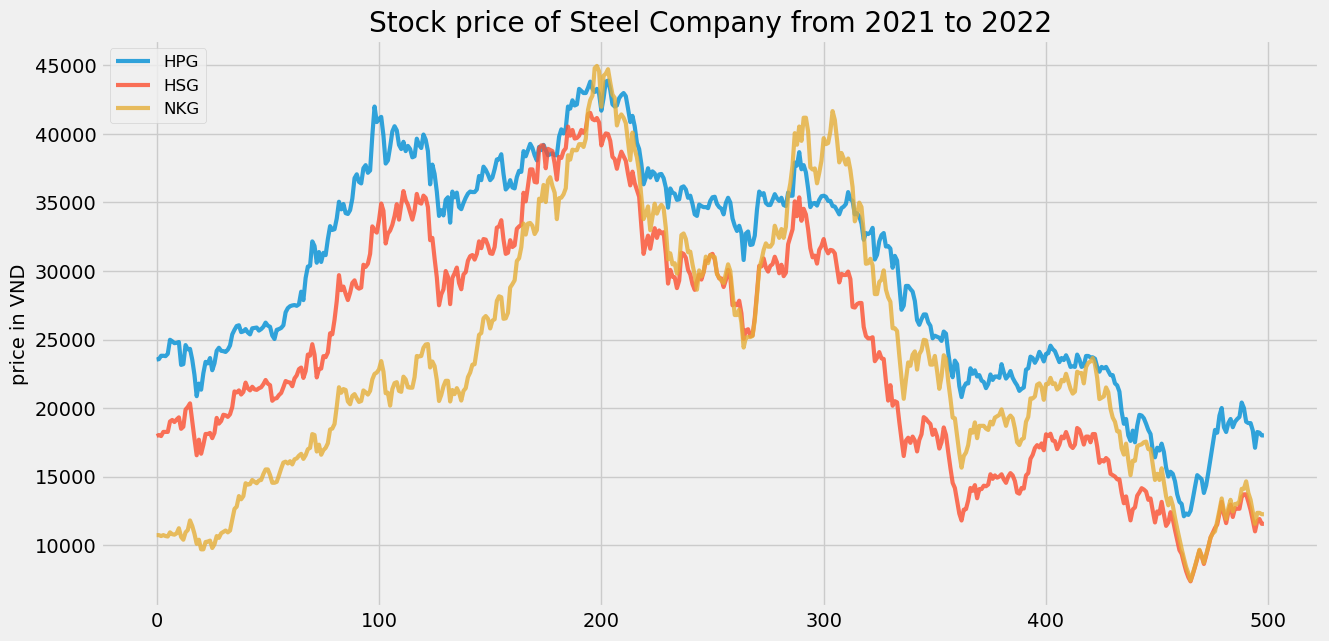

In [37]:
plt.figure(figsize=(14, 7))
for c in prices_df.columns:
    plt.plot(prices_df.index, prices_df[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in VND')
plt.title('Stock price of Steel Company from 2021 to 2022')

## Log Returns
Compute the log return as follows:
$$ \log r_t = \log \frac{p_t}{p_{t-1}} $$

In [38]:
returns_df = prices_df / prices_df.shift(1)
returns_df = np.log(returns_df[1:])
returns_df.head(5)

,HPG,HSG,NKG
1,0.001189,0.004224,0.000000
2,0.010554,-0.004224,-0.006267
3,0.000000,0.016736,0.006267
4,-0.001176,0.000000,-0.006267
5,0.006996,0.000000,-0.003195


Text(0.5, 1.0, 'Daily returns of Steel Stock')

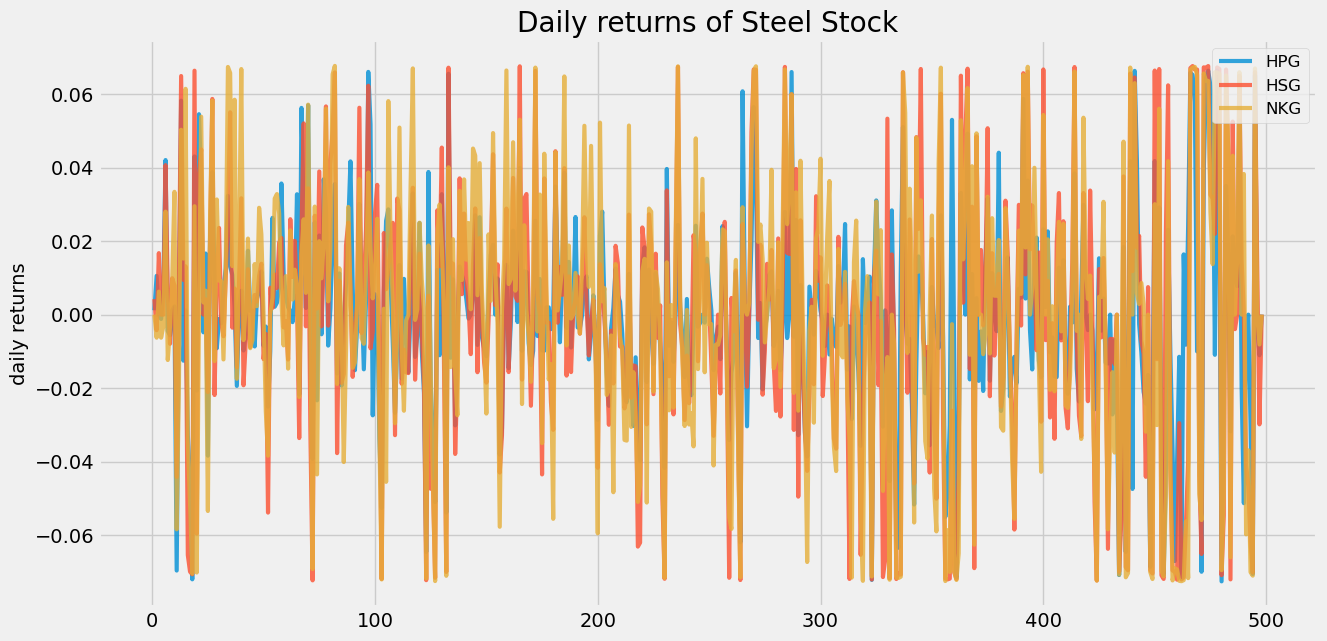

In [39]:
plt.figure(figsize=(14, 7))
for c in returns_df.columns:
    plt.plot(returns_df.index, returns_df[c], lw=3, alpha=0.8, label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')
plt.title('Daily returns of Steel Stock')

HSG has one highest negative spike negative. NKG has one highest positive spike. And HPG seems to be the least volatile.

## Sharpe ratio
The Sharpe ratio is defined as
$$ SR(W) = \frac{R(W) - R_f}{\sigma(W)} $$
$$ W^T 1 = 1 $$

Since we will look for max $SR(W)$ and $R_f$ is common for all $w's$, then we shall compute
$$ R(W) = W^T log(r) $$
$$ \sigma(W) = \sqrt(W^T \Sigma W) $$
$$ SR(W) ~ \frac{W^T log(r) - R_f}{\sqrt(W^T \Sigma W)}$$

#  Simulation of a Stock Portfolio
We will generate 10000 portfolios with assumed annualised risk free rate is 0.025

In [40]:
n_stocks = 3                       # number of stock
n_portfolios = 10000               # number of simulated portfolio
mean_returns = returns_df.mean()   # mean return of stock index
cov_matrix = returns_df.cov()      # covariance matrix
risk_free_rate = 0.025             # assumed risk free rate

In [41]:
weight = np.zeros((n_portfolios, 3))
expected_Return = np.zeros(n_portfolios)
expected_Volatility = np.zeros(n_portfolios)
sharpe_Ratio = np.zeros(n_portfolios)

def calculate(w):
    # Expected log return
    expected_Return = np.sum(mean_returns * w) * 250
    # Expected volatility
    expected_Volatility = np.sqrt(w.T @ cov_matrix @ w) * np.sqrt(250)
    # Sharpe Ratio
    sharpe_Ratio = (expected_Return - risk_free_rate)/ expected_Volatility
    return expected_Return, expected_Volatility, sharpe_Ratio

for i in range(n_portfolios):
    # generate random weight vector
    w = np.array(np.random.random(3))
    w /= np.sum(w)
    weight[i] = w
    expected_Return[i], expected_Volatility[i], sharpe_Ratio[i] = calculate(w)

In [42]:
result_table = pd.concat([pd.Series(expected_Return), pd.Series(expected_Volatility), pd.Series(sharpe_Ratio)], axis=1)
result_table.columns= ['Return', 'Volatility', 'Sharpe_Ratio']

In [43]:
max_sharpe_index = np.argmax(result_table['Sharpe_Ratio'])
max_sharpe_allocation = pd.DataFrame(weight[max_sharpe_index],index=returns_df.columns, columns=['allocation'])
max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
max_sharpe_allocation = max_sharpe_allocation.T

In [44]:
min_volality_index = np.argmin(result_table['Volatility'])
min_vol_allocation = pd.DataFrame(weight[min_volality_index],index=returns_df.columns,columns=['allocation'])
min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
min_vol_allocation = min_vol_allocation.T

------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.06
Annualised Volatility: 0.58


            HPG   HSG    NKG
allocation  1.6  0.77  97.62
------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: -0.13
Annualised Volatility: 0.42


              HPG   HSG   NKG
allocation  97.56  0.79  1.64


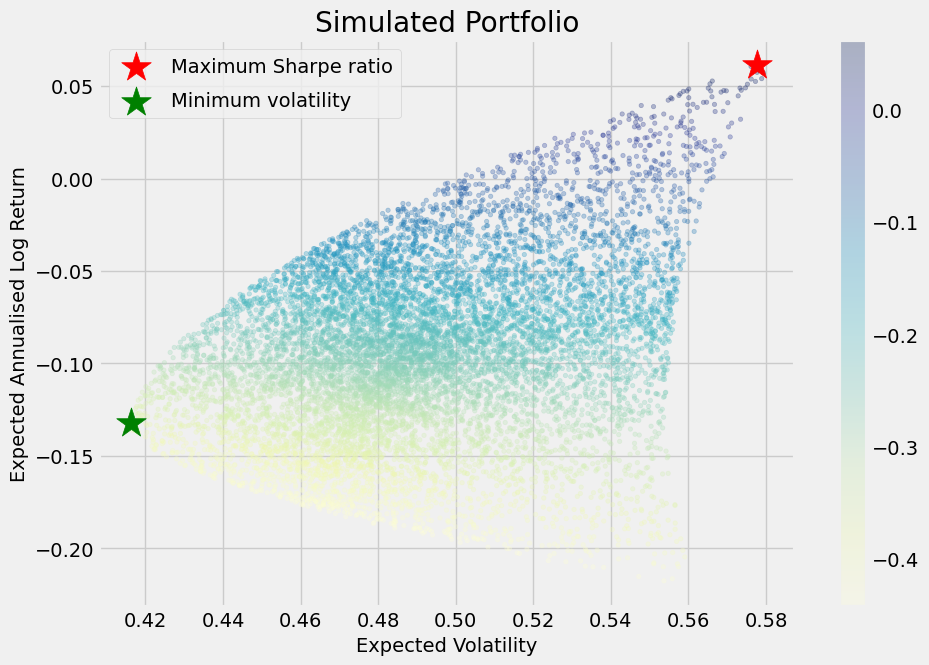

In [45]:
plt.figure(figsize=(10, 7))
plt.scatter(expected_Volatility, expected_Return, c= sharpe_Ratio, cmap='YlGnBu', marker='o', s=10, alpha=0.3)

plt.colorbar()
plt.scatter(expected_Volatility[max_sharpe_index], expected_Return[max_sharpe_index], marker='*', color='r', s=500, label='Maximum Sharpe ratio')
plt.scatter(expected_Volatility[min_volality_index], expected_Return[min_volality_index], marker='*', color='g', s=500, label='Minimum volatility')

plt.legend(labelspacing=0.8)
plt.title('Simulated Portfolio')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Annualised Log Return')

print ("-" * 60)
print ("Maximum Sharpe Ratio Portfolio Allocation\n")
print ("Annualised Return:", round(result_table.iloc[max_sharpe_index][0],2))
print ("Annualised Volatility:", round(result_table.iloc[max_sharpe_index][1],2))
print ("\n")
print (max_sharpe_allocation)
print ("-" * 60)
print ("Minimum Volatility Portfolio Allocation\n")
print ("Annualised Return:", round(result_table.iloc[min_volality_index][0],2))
print ("Annualised Volatility:", round(result_table.iloc[min_volality_index][1],2))
print ("\n")
print (min_vol_allocation)

When aiming for a portfolio with minimum risk, it is evident that a substantial portion of our budget is allocated to HPG. This decision is supported by the earlier observation of HPG being the least volatile stock among the four, as shown in the daily return plot.

On the other hand, if we are willing to take on higher risk in pursuit of higher returns, the optimal approach is to allocate a significant portion to NKG. This conclusion is drawn from the analysis of risk-adjusted returns using the Sharpe ratio, where NKG demonstrates the best performance. This determination is further supported by the previous daily return plot, which indicates that NKG is relatively more volatile.

# Portfolio Optimization theory
The plot of the randomly simulated portfolio exhibits an arch-shaped line positioned above a cluster of blue dots, which is commonly referred to as the efficient frontier. This line is deemed 'efficient' as it represents the portfolio combinations that yield the lowest risk for a given target return. Any points located on the efficient frontier offer the optimal trade-off between risk and return.

The way we found the two kinds of optimal portfolio above was by simulating many possible random choices and pick the best ones (either minimum risk or maximum risk-adjusted return).

## Maximum Sharpe ratio portfolio (MSRP)
\begin{equation*}
\begin{aligned}
& \underset{w}{\text{maximize}}
& & SR(W) = \frac{R(W) - R_f}{\sigma(W)}\\
& \text{subject to}
& &  W^T 1 = 1 \\
& && W \geq 0 \\
\end{aligned}
\end{equation*}
However, this problem is not convex so we rewrite in convex form as

\begin{equation*}
\begin{aligned}
& \underset{w}{\text{minimize}}
& & -SR(W)\\
& \text{subject to}
& &  W^T 1 = 1 \\
& && W \geq 0 \\
\end{aligned}
\end{equation*}

In [46]:
def negativeSR(w):
    w = np.array(w)
    R = np.sum(mean_returns * w) * 250
    V = np.sqrt(w @ cov_matrix @ w) * np.sqrt(250)
    SR = (R  - risk_free_rate)/ V
    return -SR

w0 = [0.5, 0.5, 0.5]                                              # initial weight
bounds = ((0, 1), (0, 1), (0, 1))
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

w_opt_sharpe = sco.minimize(fun= negativeSR,
                            x0= w0,
                            bounds= bounds,
                            constraints= constraints,
                            method= 'SLSQP')


max_sharpe_opt_allocation = pd.DataFrame(w_opt_sharpe['x'], index=returns_df.columns, columns=['allocation'])
max_sharpe_opt_allocation.allocation = [round(i*100,2)for i in max_sharpe_opt_allocation.allocation]
max_sharpe_opt_Return, max_sharpe_opt_Volatility, max_sharpe_opt_sharpe_Ratio = calculate(w_opt_sharpe['x'])
max_sharpe_opt_allocation = max_sharpe_opt_allocation.T

## Minimum Volatility portfolio

\begin{equation*}
\begin{aligned}
& \underset{w}{\text{minimize}}
& & W^T \Sigma W \\
& \text{subject to}
& &  W^T 1 = 1 \\
& && W \geq 0 \\
\end{aligned}
\end{equation*}

In [47]:
def minimize_Volatility(w):
    W = np.array(w)
    V = np.sqrt(w @ cov_matrix @ W) * np.sqrt(250)
    return V

w0 = [0.5, 0.5, 0.5]                                              # initial weight
bounds = ((0, 1), (0, 1), (0, 1))
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

w_opt_vol = sco.minimize(fun= minimize_Volatility,
                         x0= w0,
                         bounds= bounds,
                         constraints= constraints,
                         method= 'SLSQP')

min_vol_opt_allocation = pd.DataFrame(w_opt_vol['x'], index=returns_df.columns, columns=['allocation'])
min_vol_opt_allocation.allocation = [round(i*100,2)for i in min_vol_opt_allocation.allocation]
min_vol_opt_Return, min_vol_opt_Volatility, min_vol_opt_sharpe_Ratio = calculate(w_opt_vol['x'])
min_vol_opt_allocation = min_vol_opt_allocation.T

## The Minimum Risk Mean-Variance Portfolio (Efficient Markowitz Frontier)
We can also plot a line on the graph that represents the efficient portfolios for a specific risk level, known as the 'efficient frontier'. This frontier is determined by taking into account two constraints: the first constraint being that the sum of weights allocated to the portfolio must equal 1, and the second constraint being the calculation of the most efficient portfolio for a given target return.

\begin{equation*}
\begin{aligned}
& \underset{w}{\text{minimize}}
& & W^T \Sigma W \\
& \text{subject to}
& &  W^T \hat{\mu} = \bar{r} \\
& &&  W^T 1 = 1 \\
& && W \geq 0 \\
\end{aligned}
\end{equation*}

In [48]:
def get_Return(w):
    W = np.array(w)
    R = np.sum(mean_returns * W) * 250
    return R

w0 = [0.5, 0.5, 0.5]                                              # initial weight
bounds = ((0, 1), (0, 1), (0, 1))
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
               {'type': 'eq', 'fun': lambda x: get_Return(x) - R})

simulate_returns = np.linspace(expected_Return[min_volality_index], expected_Return[max_sharpe_index], 50)
volatility_opt = []

for R in simulate_returns:
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
                   {'type': 'eq', 'fun': lambda x: get_Return(x) - R})

    opt = sco.minimize(minimize_Volatility, w0,
                       method= 'SLSQP',
                       bounds= bounds,
                       constraints= constraints)

    volatility_opt.append(opt['fun'])

Text(0, 0.5, 'Expected Annualised Log Return')

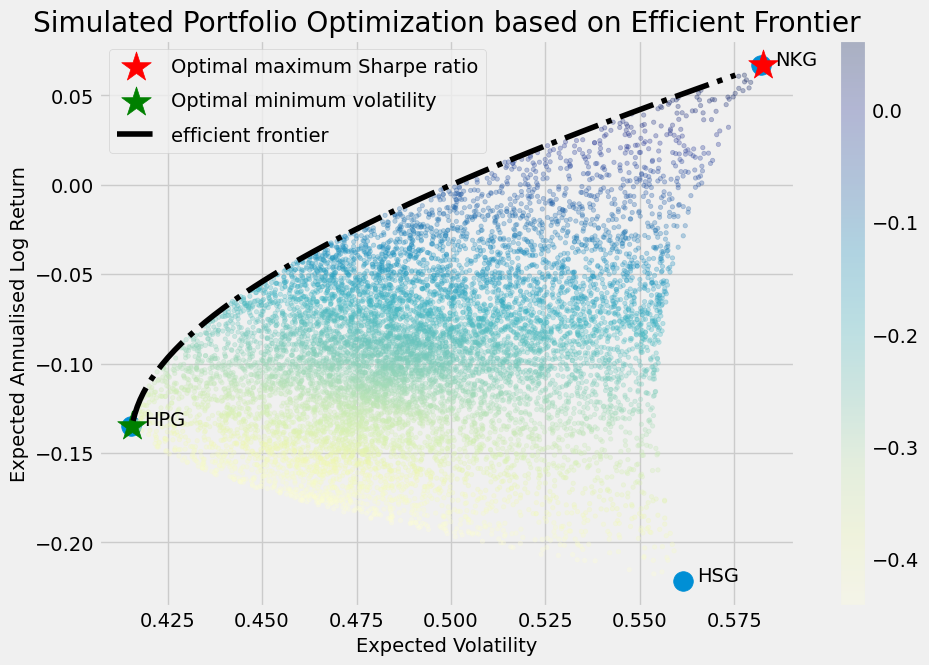

In [49]:
fig, ax = plt.subplots(figsize=(10, 7))
vol = np.std(returns_df) * np.sqrt(250)
rt = mean_returns * 250

ax.scatter(vol, rt, marker='o', s=200)
for i, txt in enumerate(returns_df.columns):
    ax.annotate(txt, (vol[i],rt[i]), xytext=(10,0), textcoords='offset points')

plt.scatter(expected_Volatility, expected_Return, c= sharpe_Ratio, cmap='YlGnBu', marker='o', s=10, alpha=0.3)

plt.colorbar()

plt.scatter(max_sharpe_opt_Volatility, max_sharpe_opt_Return, marker='*', color='r', s=500, label='Optimal maximum Sharpe ratio')
plt.scatter(min_vol_opt_Volatility, min_vol_opt_Return, marker='*', color='g', s=500, label='Optimal minimum volatility')

plt.plot(volatility_opt, simulate_returns, linestyle='-.', color='black', label='efficient frontier')
plt.legend(labelspacing=0.8)
plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Annualised Log Return')

# Optimal Portfolio
## Capital Allocation Line
The Capital Allocation Line (CAL) here assumes an investor allocates a weighted portfolio of cash and/or the optimised sharpe ratio portfolio. The line is plotted on the same axis of the Efficient Frontier.

The line (blue line in plot below) intersects the y-axis where the investor holds 100% risk free asset, where the rate of return is the dividend of a bond. The line intersects Efficient Frontier when the investor holds 100% of the Sharpe Optimised portfolio. If the portfolio hold is risk taking it can take loans where Sharpe Optimised portfolio is more that 100% and cash is less than 0%.

 There is a linear relationship in returns, because the entire portfolio only has 2 components and as the risky portfolio weight decreases the returns decrease monotonously.
 $$ E(R_p) = r_f + \frac{E(R) - r_f}{\sigma_i} \sigma_p$$

In [50]:
CAL_line = []
CAL_line.append([0, risk_free_rate])
CAL_line.append([max_sharpe_opt_Volatility, max_sharpe_opt_Volatility * max_sharpe_opt_sharpe_Ratio + risk_free_rate])
CAL_line.append([max_sharpe_opt_Volatility * 1.2, max_sharpe_opt_Volatility * max_sharpe_opt_sharpe_Ratio * 1.2 + risk_free_rate])
CAL_line = np.array(CAL_line)

## Utility Function
 $$ U = E(R) - 0.5 A \sigma ^2$$
This function is from an economic model. Utility is as expressed as returns and is discounted by the level of realised risk. the coefficient of risk aversion is A. If an invest is less risk averse A is small. We assume 25 < A < 35. Expected return, E(R) is proportionate to the level of utility . In this research we asssume A is 30

In [51]:
a = 30
utility = []
CAL_x = []
CAL_y = []

for er in np.linspace(risk_free_rate, max(expected_Return), 100):
    sd = (er - risk_free_rate)/(max_sharpe_opt_sharpe_Ratio)
    u = er - 0.5 * a * (sd ** 2)
    CAL_x.append(sd)
    CAL_y.append(er)
    utility.append(u)

In [52]:
utility_index = np.argmax(utility)

------------------------------------------------------------
Optimal maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.07
Annualised Volatility: 0.58


            HPG  HSG    NKG
allocation  0.0  0.0  100.0
------------------------------------------------------------
Optimal minimum Volatility Portfolio Allocation

Annualised Return: -0.13
Annualised Volatility: 0.42


              HPG  HSG  NKG
allocation  100.0  0.0  0.0
------------------------------------------------------------
Individual Stock Returns and Volatility

HPG : annuaised return -0.13 , annualised volatility: 0.42
HSG : annuaised return -0.22 , annualised volatility: 0.56
NKG : annuaised return 0.07 , annualised volatility: 0.58
------------------------------------------------------------


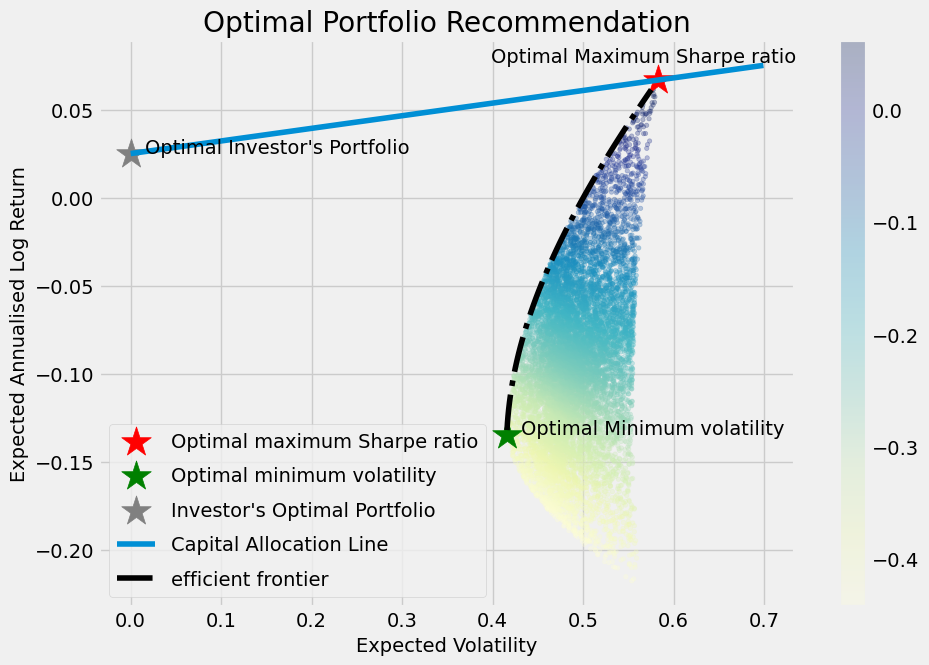

In [53]:
fig, ax = plt.subplots(figsize=(10, 7))
an_vol = np.std(returns_df) * np.sqrt(250)
an_rt = mean_returns * 250

plt.scatter(expected_Volatility, expected_Return, c= sharpe_Ratio, cmap='YlGnBu', marker='o', s=10, alpha=0.3)
plt.colorbar()

plt.scatter(max_sharpe_opt_Volatility, max_sharpe_opt_Return, marker='*', color='r', s=500, label='Optimal maximum Sharpe ratio')
ax.annotate('Optimal Maximum Sharpe ratio', (max_sharpe_opt_Volatility - 0.2, max_sharpe_opt_Return + 0.01), xytext=(10,0), textcoords='offset points')

plt.scatter(min_vol_opt_Volatility, min_vol_opt_Return, marker='*', color='g', s=500, label='Optimal minimum volatility')
ax.annotate('Optimal Minimum volatility', (min_vol_opt_Volatility, min_vol_opt_Return), xytext=(10,0), textcoords='offset points')

plt.scatter(CAL_x[utility_index],CAL_y[utility_index], marker='*', color='gray', s=500, label="Investor's Optimal Portfolio")
ax.annotate("Optimal Investor's Portfolio", (CAL_x[utility_index],CAL_y[utility_index]), xytext=(10,0), textcoords='offset points')

plt.plot(CAL_line[:,0], CAL_line[:,1],"-", label='Capital Allocation Line')
plt.plot(volatility_opt, simulate_returns, linestyle='-.', color='black', label='efficient frontier')
plt.legend(labelspacing=0.8)
plt.title('Optimal Portfolio Recommendation')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Annualised Log Return')

print ("-" * 60)
print ("Optimal maximum Sharpe Ratio Portfolio Allocation\n")
print ("Annualised Return:", round(max_sharpe_opt_Return, 2))
print ("Annualised Volatility:", round(max_sharpe_opt_Volatility, 2))
print ("\n")
print (max_sharpe_opt_allocation)
print ("-" * 60)
print ("Optimal minimum Volatility Portfolio Allocation\n")
print ("Annualised Return:", round(min_vol_opt_Return, 2))
print ("Annualised Volatility:", round(min_vol_opt_Volatility, 2))
print ("\n")
print (min_vol_opt_allocation )
print ("-" * 60)
print ("Individual Stock Returns and Volatility\n")
for i, txt in enumerate(returns_df.columns):
    print (txt,":","annuaised return",round(an_rt[i],2),", annualised volatility:",round(an_vol[i],2))
print ("-" * 60)

# CONCLUSION & RECOMENDATION
 Based on the optimal result, it appears that the stocks HPG, HSG, and NKG have different levels of performance in terms of annualized returns and volatility.

HPG has a negative annualized return of -0.13, which indicates that the stock has experienced a decline in value over the period of measurement. However, it has a relatively lower annualized volatility of 0.42, which suggests that it has shown less price fluctuation compared to the other two stocks. HSG has a more negative annualized return of -0.31, indicating a larger decline in value compared to HPG. It also has a higher annualized volatility of 0.57, suggesting that it has experienced greater price fluctuations. On the other hand, NKG has a slightly positive annualized return of 0.01, indicating a small gain in value. However, it has a higher annualized volatility of 0.59, which indicates that it has experienced relatively larger price fluctuations compared to HPG and HSG.

Overall, based on the optimal result, HPG appears to have a lower annualized return but also lower volatility compared to HSG and NKG. HSG has a more negative annualized return and higher volatility, while NKG has a small positive annualized return but also higher volatility. For the Maximum Sharpe Ratio Portfolio Allocation, the portfolio is allocated entirely to NKG with 100% allocation, and for the Minimum Volatility Portfolio Allocation, the portfolio is allocated entirely to HPG with 100% allocation.

The assumed risk-free rate is 0.025, which is higher than the annualized returns of both portfolios, it may indicate that neither portfolio is able to provide a higher return than the risk-free rate. In this case, an investor may choose to allocate a larger portion of their portfolio to the risk-free investment, as it provides a guaranteed return with no risk. 

The business situation of the steel industry is strongly influenced by several macro factors related to industries such as construction or real estate which situation of these industries is very unpredictable recently due to various micro and macro factors. In the long term, investors can consider the volatility of market to come up with reasonable investment strategies. Along with that, investors can go through and use the forecast model to come up with an appropriate investment plan.